# Examen Módulo 1 — Ciencia de Datos (G33)

**Alumno:** David Magaña Celis 

---

## Objetivo
Desarrollar un flujo reproducible para **cargar, validar, perfilar y transformar** los datos, definir la **unidad muestral**, construir una base analítica y aplicar técnicas de **limpieza, reducción y selección de variables**.

## Entregables
- Notebook: `reporte.ipynb`
- Imagen: `resultado/pca_2d.png`
- Tablas exportadas: `resultado/usuarios.csv`, `resultado/restaurantes.csv`


## Librerías

In [13]:
import pandas as pd
import examen
import examen.cargar_datos as cd
import examen.validar_datos as vd
import examen.perfil_datos as ped
import examen.analiticas as an
import examen.modelado as mo
from IPython.display import Image, display
from importlib import reload

pd.set_option("display.max_rows", 120)
pd.set_option("display.min_rows", 20)
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_colwidth", 80)
pd.set_option("display.width", 120)
pd.set_option("display.expand_frame_repr", True)

cd, vd, ped, an, mo = map(reload, (cd, vd, ped, an, mo))

## Extracción

Se crearon dos módulos dentro del paquete `examen`:
- `cargar_datos.py`: carga de tablas desde el archivo .zip ubicado en `data/` (sin extraer a disco).
- `validar_datos.py`: validación simple comparando pares CSV vs XLSX.

Tras generar reportes completos de diferencias (NaN-safe) para los pares disponibles, se decidió
utilizar los archivos CSV como fuente principal para uniones (joins) y pasos posteriores,
manteniendo los XLSX como referencia.

In [14]:
dfs = cd.cargar_dfs_desde_zip_en_data()
list(dfs.keys())

Leyendo datos/parking.csv -> key=parking_csv
Leyendo datos/usercuisine.csv -> key=usercuisine_csv
Leyendo datos/restaurants.xlsx -> key=restaurants_xlsx
Leyendo datos/users.xlsx -> key=users_xlsx
Leyendo datos/restaurants.csv -> key=restaurants_csv
Leyendo datos/cuisine.csv -> key=cuisine_csv
Leyendo datos/users.csv -> key=users_csv
Leyendo datos/ratings.csv -> key=ratings_csv
Leyendo datos/hours.csv -> key=hours_csv
Leyendo datos/userpayment.csv -> key=userpayment_csv
Leyendo datos/payment_methods.csv -> key=payment_methods_csv


['parking_csv',
 'usercuisine_csv',
 'restaurants_xlsx',
 'users_xlsx',
 'restaurants_csv',
 'cuisine_csv',
 'users_csv',
 'ratings_csv',
 'hours_csv',
 'userpayment_csv',
 'payment_methods_csv']

In [15]:
reps = vd.reporte_todos_pares_completo(dfs)

for base, rep in reps.items():
    print(rep["summary"])
    display(rep["diffs"])

{'base': 'restaurants', 'csv_shape': (130, 21), 'xlsx_shape': (130, 21), 'same_columns': True, 'equals_pandas': False, 'mismatch_cells': 107, 'note': ''}


,row,col,csv,xlsx
0,1,zip,78280,78280
1,2,latitude,22.149709,22.149709
2,2,longitude,-100.976093,-100.976093
3,2,zip,78000,78000
4,3,city,victoria,victoria
5,5,zip,74000,74000
6,6,latitude,23.754357,23.754357
7,6,name,Taqueria EL amigo,Taqueria EL amigo
8,6,zip,87018,87018
9,8,latitude,23.760268,23.760268


{'base': 'users', 'csv_shape': (138, 19), 'xlsx_shape': (138, 19), 'same_columns': True, 'equals_pandas': False, 'mismatch_cells': 173, 'note': ''}


,row,col,csv,xlsx
0,0,smoker,false,False
1,1,smoker,false,False
2,2,smoker,false,False
3,3,longitude,-99.183,-99.183
4,3,smoker,false,False
5,4,smoker,false,False
6,5,longitude,-100.983,-100.983
7,5,smoker,true,True
8,6,latitude,22.118464,22.118464
9,6,smoker,false,False


In [16]:
dfs_csv = cd.obtener_csvs(dfs)

## Perfilado de DataFrames (CSV)

En esta sección se realiza el **perfilado exploratorio** de todos los DataFrames provenientes de archivos **CSV**, con el objetivo de:
- identificar estructura (filas/columnas),
- revisar distribución y tipo de variables,
- detectar valores faltantes y posibles inconsistencias,
- y documentar la calidad inicial de los datos antes de la integración/modelado.

In [17]:
dfs_perfil = ped.perfilar_todos_los_dfs(dfs_csv)

partes = []
for name, p in dfs_perfil.items():
    if p is None or p.empty:
        continue
    
    p = p.dropna(axis=1, how="all")
    partes.append(p.assign(df=name))

perfil_all = pd.concat(partes, ignore_index=True) if partes else pd.DataFrame()

cols = ["df","Variable","Tipo_inferido","Dtype","Nulos","%Nulos","Unicos","%Cardinalidad","Min","Max","Media","Moda","Top"]
perfil_all = perfil_all[[c for c in cols if c in perfil_all.columns]]

perfil_all


,df,Variable,Tipo_inferido,Dtype,Nulos,%Nulos,Unicos,%Cardinalidad,Min,Max,Media,Moda,Top
0,users_csv,userID,Texto,object,0,0.0,138,100.00,NaN,NaN,NaN,U1001,"U1001 (1), U1095 (1), U1089 (1), U1090 (1), U1091 (1), U1092 (1), U1093 (1),..."
1,users_csv,latitude,Numerica,float64,0,0.0,128,92.75,18.813348,23.771030,21.810389,None,None
2,users_csv,longitude,Numerica,float64,0,0.0,126,91.30,-101.054680,-99.067106,-100.291857,None,None
3,users_csv,weight,Numerica,int64,0,0.0,49,35.51,40.000000,120.000000,64.869565,None,None
4,users_csv,height,Numerica,float64,0,0.0,38,27.54,1.200000,2.000000,1.667536,None,None
5,users_csv,birth_year,Numerica,int64,0,0.0,21,15.22,1930.000000,1994.000000,1984.702899,None,None
6,users_csv,color,Categorica,object,0,0.0,8,5.80,NaN,NaN,NaN,blue,"blue (45), black (21), green (19), red (15), yellow (12), purple (11), white..."
7,users_csv,dress_preference,Categorica,object,0,0.0,5,3.62,NaN,NaN,NaN,no preference,"no preference (53), formal (41), informal (35), ? (5), elegant (4)"
8,users_csv,interest,Categorica,object,0,0.0,5,3.62,NaN,NaN,NaN,variety,"variety (50), technology (36), none (30), eco-friendly (16), retro (6)"
9,users_csv,religion,Categorica,object,0,0.0,5,3.62,NaN,NaN,NaN,Catholic,"Catholic (99), none (30), Christian (7), Mormon (1), Jewish (1)"


In [18]:
ped.reporte_relacional(dfs_csv, ratings_key="ratings_csv")

,df,key,rows,unique_keys,min_per_key,max_per_key,mean_per_key,keys_in_universe,pct_keys_in_universe
0,users_csv,userID,138,138,1,1,1.000000,138,1.000000
1,usercuisine_csv,userID,330,138,1,103,2.391304,138,1.000000
2,userpayment_csv,userID,177,133,1,4,1.330827,133,1.000000
3,ratings_csv,userID,1161,138,3,18,8.413043,138,1.000000
4,ratings_csv,placeID,1161,130,3,36,8.930769,130,1.000000
5,restaurants_csv,placeID,130,130,1,1,1.000000,130,1.000000
6,parking_csv,placeID,702,675,1,3,1.040000,130,0.192593
7,cuisine_csv,placeID,916,769,1,9,1.191157,95,0.123537
8,payment_methods_csv,placeID,1314,615,1,8,2.136585,114,0.185366
9,hours_csv,placeID,2339,694,2,12,3.370317,128,0.184438


## Unidad muestral y modelo relacional

A partir del **reporte relacional** (`reporte_relacional`) se identificó que la tabla `ratings_csv` funciona como **tabla de hechos**, ya que contiene directamente las variables de calificación (`rating`, `food_rating`, `service_rating`) y conecta a usuarios y restaurantes mediante las llaves `userID` y `placeID`.

### Evidencia y justificación

- **Tabla de hechos:** `ratings_csv` (1161 filas).
- **Llaves presentes:** `userID` (138 únicos) y `placeID` (130 únicos).
- **Unidad muestral definida:** **1 fila = 1 evaluación** de un usuario (`userID`) a un restaurante (`placeID`).
- **Llave lógica de la evaluación:** (`userID`, `placeID`), y se verificó que **no existen duplicados** para este par, por lo que cada registro representa una evaluación única.

En consecuencia, la base principal para análisis y modelado se construye **partiendo de `ratings_csv`**, preservando su número de filas y, por lo tanto, su unidad muestral.

### Dimensiones analíticas para enriquecer la base

Con el mismo reporte relacional se observó que:
- `users_csv` es **1 a 1** con `userID` (mean_per_key = 1), por lo que puede integrarse directamente a nivel usuario.
- `restaurants_csv` es **1 a 1** con `placeID` (mean_per_key = 1), por lo que puede integrarse directamente a nivel restaurante.
- Otras tablas (`usercuisine_csv`, `userpayment_csv`, `cuisine_csv`, `payment_methods_csv`, `hours_csv`, `parking_csv`) presentan relaciones **1 a muchos** respecto a `userID` o `placeID`, por lo que se transforman previamente mediante **agregaciones** (conteos y listas de categorías) para mantener una sola fila por llave.

Para mantener el notebook legible y robustecer la paquetería, se implementaron funciones que construyen:
- `dim_user` (**usuarios.csv**): tabla analítica a nivel `userID` (1 fila por usuario), integrando `users_csv` y agregados por `userID`.
- `dim_place` (**restaurantes.csv**): tabla analítica a nivel `placeID` (1 fila por restaurante), integrando `restaurants_csv` y agregados por `placeID`.

Finalmente, la **base de modelado** se obtiene realizando `LEFT JOIN` desde `ratings_csv` hacia `dim_user` y `dim_place`, asegurando que el número de filas permanezca en 1161 y que la unidad muestral continúe siendo **la evaluación usuario–restaurante**.


In [19]:
dim_user = an.construir_dim_usuario(dfs_csv)
dim_place = an.construir_dim_restaurante(dfs_csv)
an.exportar_tablas_analiticas(dim_user, dim_place, out_dir="./resultado")

base = an.construir_base_modelado(dfs_csv, dim_user, dim_place)

## Ingeniería de datos: variables nuevas a nivel de la unidad muestral (`ratings`)

Con la unidad muestral definida como **1 fila = 1 evaluación** (`userID`, `placeID`), se construyeron variables adicionales **derivadas directamente de las calificaciones** de `ratings_csv`. Estas variables se calculan al mismo grano de la unidad muestral (no generan explosión de filas) y buscan capturar:

- La **intensidad promedio** de la evaluación (señal global).
- La **consistencia o discrepancia** entre componentes (comida vs servicio).
- El **contexto del evaluador** (tendencia típica del usuario) y del evaluado (tendencia típica del restaurante), calculados con enfoque *leave-one-out* para no usar la misma observación en su propio promedio.

### Variables creadas (≥ 5) y justificación

- **`subrating_mean`**: resume en una sola señal el nivel promedio entre `food_rating` y `service_rating`, útil para modelos que aprovechan una medida global de calidad.
- **`subrating_gap`**: captura si la evaluación favorece más la comida o el servicio; ayuda a distinguir perfiles donde una dimensión domina a la otra.
- **`subrating_gap_abs`**: mide la consistencia entre comida y servicio; discrepancias grandes pueden indicar experiencias “mixtas” que un promedio no detecta.
- **`user_mean_rating_loo`**: representa la tendencia típica del usuario a calificar alto/bajo (sesgo del evaluador) sin incluir la evaluación actual; permite ajustar por usuarios más exigentes o más complacientes.
- **`place_mean_rating_loo`**: representa la tendencia típica del restaurante a recibir mejores/peores calificaciones sin incluir la evaluación actual; provee un contexto de reputación promedio a nivel `placeID`.

In [20]:
base = an.agregar_features_ratings(base)

cols_new = [
    "subrating_mean",
    "subrating_gap",
    "subrating_gap_abs",
    "user_mean_rating_loo",
    "place_mean_rating_loo",
]

display(base[cols_new].head() )

display(base.shape[1])

,subrating_mean,subrating_gap,subrating_gap_abs,user_mean_rating_loo,place_mean_rating_loo
0,2.0,0,0,1.250000,1.314286
1,1.5,1,1,1.250000,1.173913
2,2.0,0,0,1.250000,1.258065
3,2.0,0,0,1.500000,1.142857
4,1.5,-1,1,0.571429,0.833333


66

## Construcción de variable objetivo

Se definió una **variable objetivo categórica binaria** alineada a la unidad muestral (1 fila = 1 evaluación).  
El objetivo consiste en identificar evaluaciones **altas** del restaurante.

- **Objetivo (`target`)**: 1 si el usuario otorgó la calificación máxima (**rating = 2**), 0 en caso contrario.
- Este planteamiento permite:
  - formular un problema de **clasificación** (alto vs no-alto),
  - habilitar técnicas como **SelectKBest** y **WoE/IV** (que requieren objetivo),
  - mantener coherencia con el grano del dataset (no se agregan filas).

Se conserva la columna `rating` como variable original y se agrega `target` como columna adicional.


In [21]:
base_t = mo.construir_objetivo(
    base,
    tipo="binaria",
    regla_binaria="rating_eq_2",
    col_rating="rating",
    out_col="target",
)

base_t["target"].value_counts(dropna=False), base_t["target"].value_counts(normalize=True).round(4)

(target
 0    675
 1    486
 Name: count, dtype: Int64,
 target
 0    0.5814
 1    0.4186
 Name: proportion, dtype: Float64)

## Limpieza de datos

La limpieza se implementa con un enfoque reproducible: primero se genera evidencia (tablas) y luego se aplican reglas.

Procesos evaluados:
- **Valores extremos**: se revisan únicamente variables continuas plausibles (p.ej. edad/peso/altura/distancia).  
  Las variables `rating`, `food_rating` y `service_rating` no se tratan como outliers porque están acotadas (0–2).
- **Variables poco pobladas (65%)**: se identifican columnas con porcentaje de nulos superior al umbral.
- **Valores ausentes**: se cuantifican por columna y se tratan mediante imputación en preprocesamiento (mediana/moda).
- **Correlación alta**: se remueven **solo** variables con correlación perfecta **|corr| = 1** 
- **Variables unarias**: se eliminan columnas con 0 o 1 valor distinto (incluyendo NA), ya que no aportan señal.

Cuando algún proceso no aplica (por ejemplo, no hay pares con |corr|=1), se justifica mostrando la evidencia.

In [22]:
y = base_t["target"].copy()
X = base_t.drop(columns=["target"])

rep = mo.reporte_limpieza(X, missing_threshold=0.65)

print("=== Variables poco pobladas (flag 65%) ===")
display(rep["missing"].query("flag_poco_poblada == True").head(50))

print("=== Variables unarias ===")
display(rep["unarias"])

print("=== Pares con |corr| = 1 (si existen) ===")
display(rep["corr_abs_eq_1"])

=== Variables poco pobladas (flag 65%) ===


,col,pct_null,flag_poco_poblada
0,fax,100.00,True
1,url,89.41,True


=== Variables unarias ===


,col,nunique_incl_na
0,n_rest_parking_types,1
1,fax,1


=== Pares con |corr| = 1 (si existen) ===


,col_a,col_b,corr
0,birth_year,age_ref,-1.0


In [23]:
cfg = mo.LimpiezaConfig(
    missing_threshold=0.65,
    drop_missing=True,
    drop_unarias=True,
    drop_corr_abs_eq_1=True,
    outlier_strategy="winsorize",
)

X_clean, rep_apply = mo.aplicar_limpieza(X, config=cfg)
rep_apply


{'shape_before': (1161, 66),
 'drop_poco_pobladas': ['fax', 'url'],
 'drop_unarias': ['n_rest_parking_types'],
 'drop_corr_abs_eq_1': ['age_ref'],
 'outlier_cols': ['weight', 'height'],
 'outlier_strategy': 'winsorize',
 'shape_after': (1161, 62)}

## Reducción de dimensiones (no secuencial)

A partir del conjunto resultante de la limpieza (`X_clean`) se aplicaron técnicas **independientes** (no secuenciales):

1) **PCA a 2 dimensiones** para visualizar la estructura del dataset en un espacio reducido.  
   Se genera un archivo **.png** como entregable.

2) **Clustering de variables** para mitigar multicolinealidad: se agrupan variables similares (por 1−|corr|) y se selecciona
   un representante por cluster (por mayor información mutua con el objetivo, cuando aplica).

3) **SelectKBest** para seleccionar variables con mayor asociación estadística con el objetivo.

4) **WoE e IV** (solo aplica por objetivo binario): se rankean variables por su poder de separación entre clases.

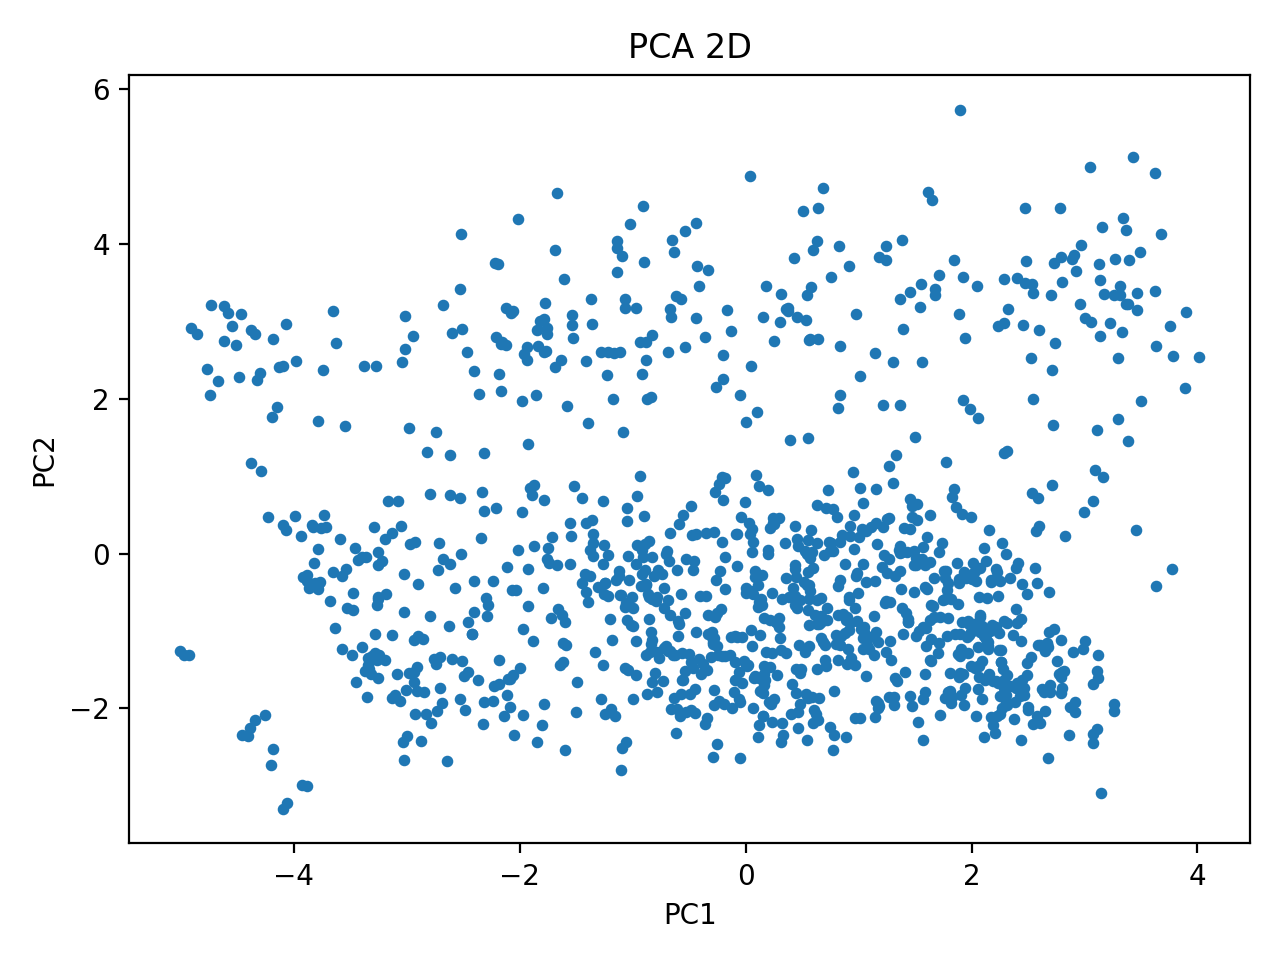

In [24]:
pca_out = mo.pca_2d_y_png(X_clean, out_png="./resultado/pca_2d.png")
pca_out["explained_var"], pca_out["png_path"]
display(Image(filename="resultado/pca_2d.png"))

In [25]:
pre = mo.construir_preprocesador(X_clean)
pre.fit(X_clean, y)

for name, trans, cols in pre.transformers_:
    print("\n=== Transformer:", name, "===")
    print("Type:", type(trans))
    if hasattr(trans, "steps"):  # Pipeline
        print("Pipeline steps:", [s[0] for s in trans.steps])


=== Transformer: num ===
Type: <class 'sklearn.pipeline.Pipeline'>
Pipeline steps: ['san', 'imp', 'sc']

=== Transformer: cat ===
Type: <class 'sklearn.pipeline.Pipeline'>
Pipeline steps: ['san', 'imp', 'oh']


In [26]:
rep_vars = mo.clustering_variables_representantes(
    X_clean,
    y=y,
    distance_threshold=0.30,
    top_n=25,
)
display(rep_vars)

,cluster,feature,score
0,15,num__rating,0.680268
1,343,num__user_mean_rating_loo,0.240018
2,239,num__place_mean_rating_loo,0.221919
3,17,num__latitude,0.181376
4,90,num__longitude,0.177762
5,144,cat__hours_Mon_10:30-22:00,0.052254
6,331,cat__interest_eco-friendly,0.041892
7,327,num__weight,0.041368
8,315,cat__hours_Tue_10:30-23:00,0.040970
9,243,cat__userID_U1059,0.040717


In [27]:
top_kbest = mo.selectkbest_top(X_clean, y=y, k=20)
display(top_kbest)

,feature,f_score
0,num__rating,3915.643107
1,num__subrating_mean,778.510675
2,num__food_rating,582.594657
3,num__service_rating,564.027244
4,num__user_mean_rating_loo,297.536290
5,cat__interest_eco-friendly,34.661749
6,num__latitude,24.891829
7,cat__color_blue,24.711953
8,num__birth_year,23.506563
9,cat__drink_level_casual drinker,18.845537


In [28]:
iv_rank = mo.ranking_iv(X_clean, y_bin=y, n_bins=5)
display(iv_rank.head(30))

,variable,iv
0,rating,39.669721
1,userID,7.166492
2,subrating_mean,2.853139
3,the_geom_meter,2.375782
4,name,2.373427
5,food_rating,1.980128
6,service_rating,1.737799
7,address,1.712740
8,user_cuisines,1.351892
9,user_mean_rating_loo,1.196137


## Cuestionario

### 1) ¿Por qué Excel no es una Base de Datos?
Excel es una herramienta de hoja de cálculo, no un motor de base de datos. Aunque permite almacenar datos, no está diseñado para:
- garantizar **integridad** (restricciones, llaves foráneas, reglas consistentes),
- manejar **concurrencia** (múltiples usuarios modificando con control transaccional),
- asegurar **trazabilidad y auditoría** robusta,
- optimizar consultas complejas a gran escala (índices, planes de ejecución),
- aplicar transacciones ACID de forma nativa.
Por ello, Excel sirve para análisis y reporteo, pero no sustituye un sistema de gestión de bases de datos (DBMS).

### 2) Diferencia entre Ingeniero de Datos, Científico de Datos y Arquitecto de Datos
- **Ingeniero de Datos**: construye y mantiene pipelines/ETL, ingesta, limpieza, orquestación, calidad de datos, y pone datos listos para consumo (analytics/ML). Optimiza almacenamiento, rendimiento y confiabilidad operativa.
- **Científico de Datos**: formula el problema analítico, explora datos, crea variables, entrena/evalúa modelos y comunica hallazgos. Se enfoca en inferencia/predicción y validación.
- **Arquitecto de Datos**: define la arquitectura global (capas, herramientas, estándares, gobierno, seguridad, modelado lógico/físico). Asegura que la plataforma sea escalable, mantenible y alineada al negocio.

### 3) ¿Cómo reduce dimensiones PCA?
PCA reduce dimensiones proyectando los datos a un nuevo sistema de ejes (componentes principales) que capturan la mayor variabilidad posible. En lugar de usar las variables originales, usa combinaciones de ellas que resumen la información, permitiendo:
- representar el dataset con menos dimensiones,
- disminuir redundancia/colinealidad,
- facilitar visualización (por ejemplo a 2D) y acelerar algunos procesos.

### 4) Diferencia entre importancia de variables y poder predictivo
- **Importancia de variables** suele referirse a una medida interna del modelo (por ejemplo, cuánto aporta una variable al reducir error o mejorar una partición). Depende del algoritmo y puede variar entre modelos.
- **Poder predictivo** mide qué tan bien una variable (o conjunto) ayuda a predecir el objetivo de forma verificable (por ejemplo, con métricas y validación). Una variable puede verse “importante” en un modelo específico, pero no necesariamente generaliza o mantiene desempeño fuera de muestra.